In [11]:
import import_ipynb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import models
import evaluation_methods
import input_preprocessing
import output_preprocessing
import data_preprocessing


In [4]:
# Load the data
data = data_preprocessing.Data(tags_or_genres='genres', min_label_occ=50)
X = input_preprocessing.bag_of_words(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])


In [5]:
evaluate = evaluation_methods.f1score

In [6]:
def plot_results_KNN(k=10):
# Predict the labels for the input data
	scores = []
	for k in range(1, k):
		print(f"Calculating for k = {k}...")
		model = models.KNN(X, y, evaluate, k)
		model.fit()
		scores.append(model.evaluate())
		print(f"F1-score: {scores[-1]}")

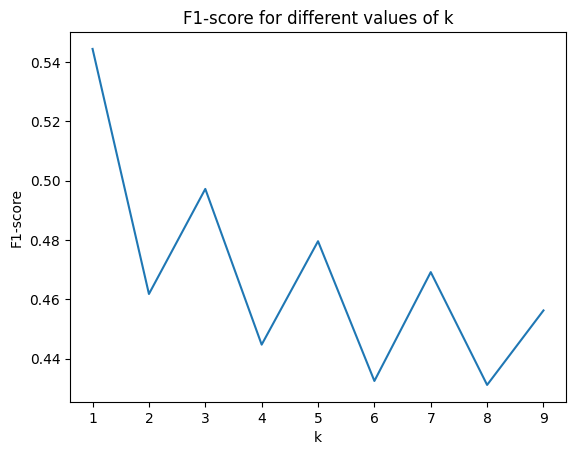

In [7]:
k = 10
scores = [
  0.5443504167855219, 
  0.4617946827427679,
  0.4971886431446144,
  0.44473149061329936,
  0.47957264430192403,
  0.432495299724542,
  0.46916348600508906,
  0.43116101760846454,
  0.45625594125938307
]
plt.xlabel('k')
plt.ylabel('F1-score')
plt.title('F1-score for different values of k')
plt.plot(range(1, k), scores)
plt.show()

In [12]:
evaluate = {
  'recall': evaluation_methods.recall,
  'f1': evaluation_methods.f1score,
  'hamming': evaluation_methods.hamming_loss,
  'exact_match': evaluation_methods.exactmatch,
#   'jaccard': evaluation_methods.jaccard_score,
}

def get_scores():
	scores = []
	model = models.KNN(X, y, evaluate, 1)
	model.fit()
	for name, eval_func in evaluate.items():
		print(f"Calculating for {name}...")
		model.evaluate_ = eval_func
		scores.append(model.evaluate())
		print(f"{name}: {scores[-1]}")
	return scores





In [36]:
def plot_results_KNN(scores):
	plt.bar(list(evaluate.keys()), scores)
	plt.xlabel('Evaluation method')
	plt.ylabel('Score')
	plt.title('Scores over different evaluation methods')
	plt.show()

In [31]:
scores = get_scores()

Calculating for recall...
recall: 0.555663869531425
Calculating for f1...
f1: 0.5430132789217232
Calculating for hamming...
hamming: 0.04914253043504744
Calculating for exact_match...
exact_match: 0.3447071950473311


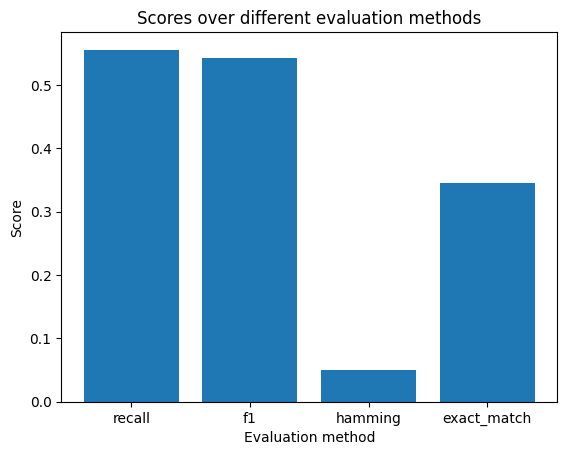

In [37]:
plot_results_KNN(scores)